In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('opsd_germany_daily.csv', index_col=0, parse_dates=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
dtypes: float64(4)
memory usage: 171.2 KB


In [22]:
df.describe()

,Consumption,Wind,Solar,Wind+Solar
count,4383.000000,2920.000000,2188.000000,2187.000000
mean,1338.675836,164.814173,89.258695,272.663481
std,165.775710,143.692732,58.550099,146.319884
min,842.395000,5.757000,1.968000,21.478000
25%,1217.859000,62.353250,35.179250,172.185500
50%,1367.123000,119.098000,86.407000,240.991000
75%,1457.761000,217.900250,135.071500,338.988000
max,1709.568000,826.278000,241.580000,851.556000


In [23]:
df.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


### Visualize data

[]

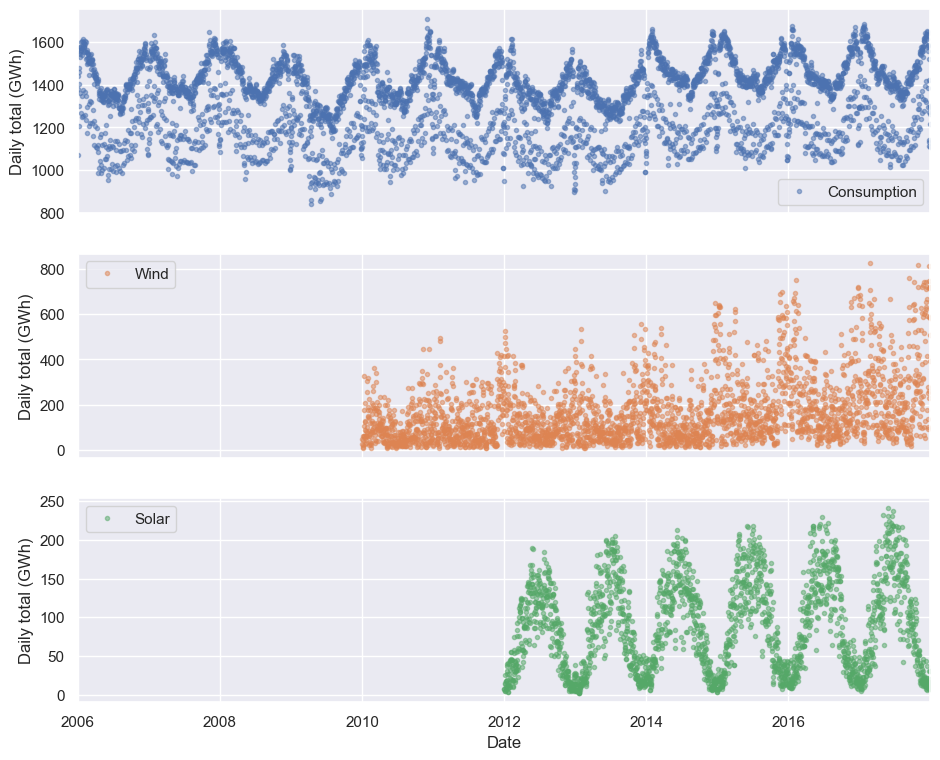

In [29]:
sns.set_theme(rc={'figure.figsize':(11, 4)})
colls_plot = ['Consumption', 'Wind', 'Solar']
axes = df[colls_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily total (GWh)')
plt.plot()

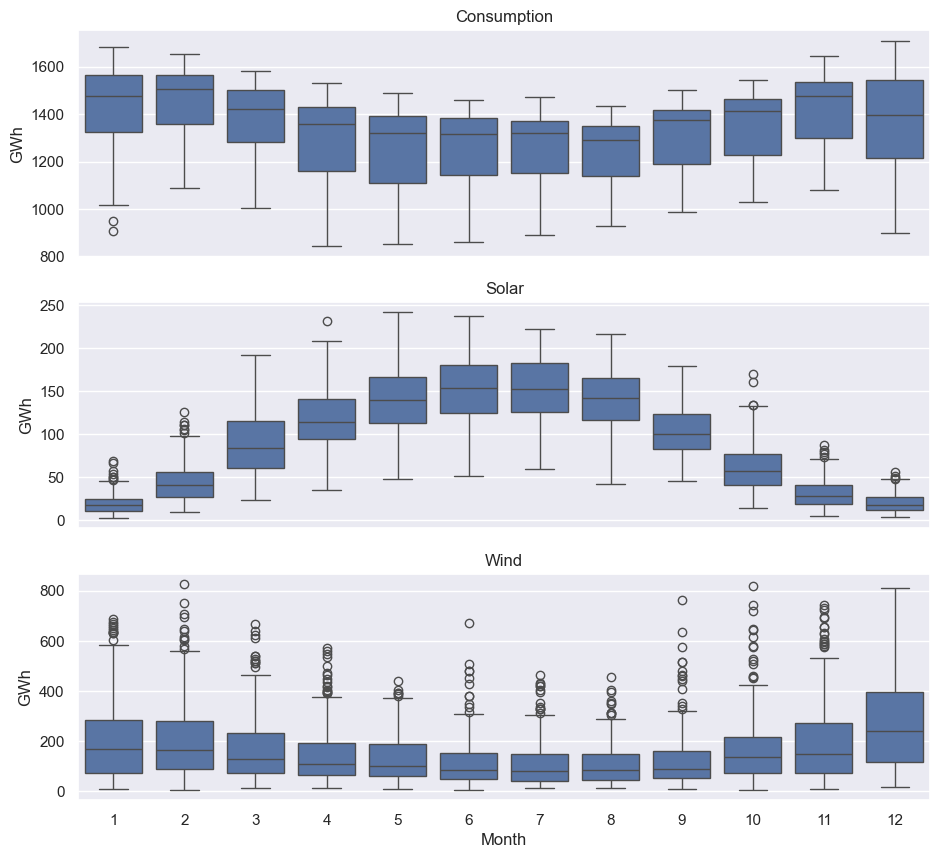

In [34]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
df['Month'] = df.index.month
for name, ax in zip(['Consumption',  'Solar', 'Wind'], axes):
    sns.boxplot(data=df, x='Month', y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)
    if ax != axes[-1]:
        ax.set_xlabel('')

In [96]:
times_sample = pd.to_datetime(['2013-02-03', '2013-02-06', '2013-02-08'])
consum_sample = df.loc[times_sample, 'Consumption'].copy()
consum_freq = consum_sample.asfreq('D')
consum_freq['Consumption - Forward Fill'] = consum_sample.asfreq('D', method='ffill')
consum_freq['Consumption - Forward Fill']

2013-02-03    1109.639
2013-02-04    1109.639
2013-02-05    1109.639
2013-02-06    1451.449
2013-02-07    1451.449
2013-02-08    1433.098
Freq: D, Name: Consumption, dtype: float64

### Resampling

In [91]:
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
df_weekly_mean = df[data_columns].resample('W').mean()
df_weekly_mean.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN


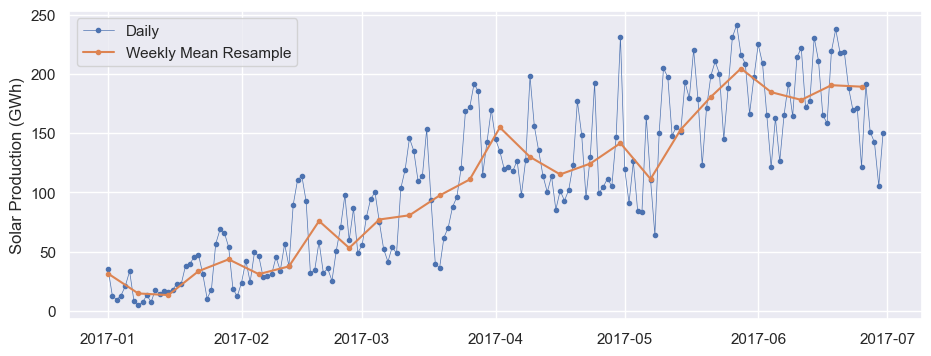

In [92]:
start, end = '2017-01', '2017-06'
fig, ax = plt.subplots()
ax.plot(df.loc[start:end, 'Solar'], marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(df_weekly_mean.loc[start:end, 'Solar'], marker='.', linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Solar Production (GWh)')
ax.legend()
plt.show()

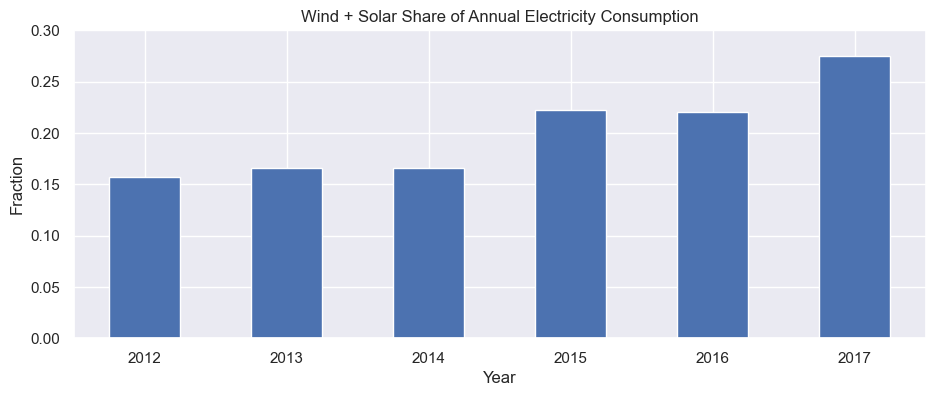

In [99]:
df_annual = df[data_columns].resample('YE').sum(min_count=360)
df_annual['Year'] = pd.DatetimeIndex(df_annual.index).year
df_annual = df_annual.set_index('Year', drop=True)
df_annual['Wind+Solar/Consumption'] = df_annual['Wind+Solar'] / df_annual['Consumption']

ax = df_annual.loc[2012:,'Wind+Solar/Consumption'].plot.bar(color='C0')
ax.set_ylabel('Fraction')
ax.set_ylim(0, 0.3)
ax.set_title('Wind + Solar Share of Annual Electricity Consumption')
plt.xticks(rotation=0)
plt.show()

### Rolling windows

In [101]:
df_7d = df[data_columns].rolling(7, center=True).mean()
print(df_7d.head(10))
print(df.head(10))


            Consumption  Wind  Solar  Wind+Solar
Date                                            
2006-01-01          NaN   NaN    NaN         NaN
2006-01-02          NaN   NaN    NaN         NaN
2006-01-03          NaN   NaN    NaN         NaN
2006-01-04  1361.471429   NaN    NaN         NaN
2006-01-05  1381.300143   NaN    NaN         NaN
2006-01-06  1402.557571   NaN    NaN         NaN
2006-01-07  1421.754429   NaN    NaN         NaN
2006-01-08  1438.891429   NaN    NaN         NaN
2006-01-09  1449.769857   NaN    NaN         NaN
2006-01-10  1469.994857   NaN    NaN         NaN
            Consumption  Wind  Solar  Wind+Solar  Month
Date                                                   
2006-01-01     1069.184   NaN    NaN         NaN      1
2006-01-02     1380.521   NaN    NaN         NaN      1
2006-01-03     1442.533   NaN    NaN         NaN      1
2006-01-04     1457.217   NaN    NaN         NaN      1
2006-01-05     1477.131   NaN    NaN         NaN      1
2006-01-06     1403.

### Trends

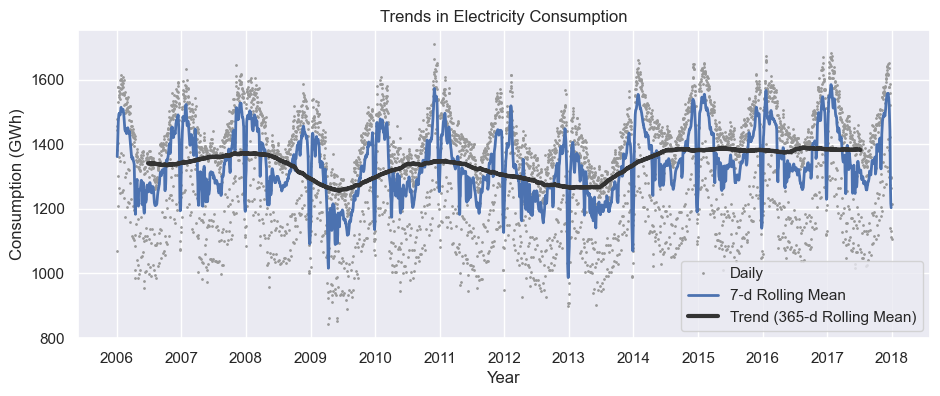

In [105]:
import matplotlib.dates as mdates

df_365d = df[data_columns].rolling(window=365, center=True, min_periods=360).mean()

fig, ax = plt.subplots()
ax.plot(df['Consumption'], marker='.', markersize=2, color='0.6',linestyle='None', label='Daily')
ax.plot(df_7d['Consumption'], linewidth=2, label='7-d Rolling Mean')
ax.plot(df_365d['Consumption'], color='0.2', linewidth=3, label='Trend (365-d Rolling Mean)')

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption')
plt.show()

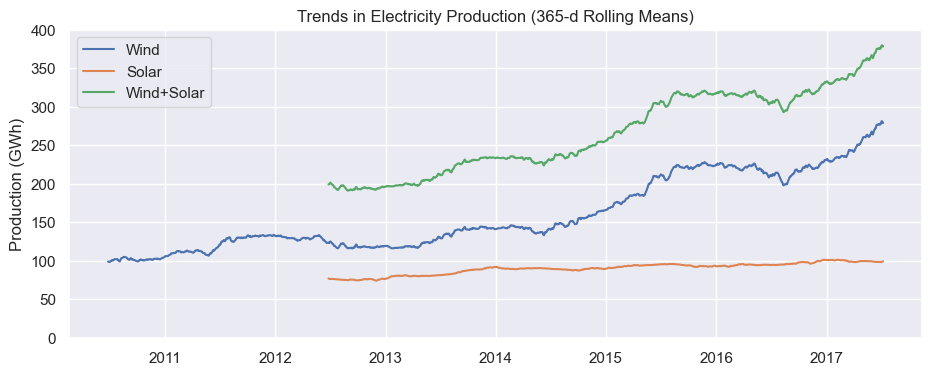

In [106]:
fig, ax = plt.subplots()
for nm in ['Wind', 'Solar', 'Wind+Solar']:
    ax.plot(df_365d[nm], label=nm)
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.set_ylim(0, 400)
    ax.legend()
    ax.set_ylabel('Production (GWh)')
    ax.set_title('Trends in Electricity Production (365-d Rolling Means)')

plt.show()